<a href="https://colab.research.google.com/github/ahadAli102/covid-sentiment-analysis/blob/main/data_visulalzation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
test_file ='/content/data-collect - Copy.csv' 
stopwords_list = '/content/stopwords-bn.txt'
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
data = pd.read_csv(test_file, skipinitialspace=True, engine="python")
data.head(10)

,comments,sentiment
0,সুষ্ঠু পরিকল্পনার অভাব। ১০ শিক্ষা প্রতিষ্ঠানের...,neutral
1,এইখানে বিশৃঙ্খলার জন্য হাসপাতাল কর্তৃপক্ষ সম্প...,negative
2,টিকা দিতে এসে লাঠির আঘাত বা হয়রানির স্বীকার হও...,neutral
3,"এটা কি করোনা গ্রহণের টিকা, নাকি প্রতিরোধের টিক...",negative
4,এত শিক্ষার্থীকে একদিনে জড় না করে দুচারদিনে ও ত...,positive
5,প্রতিটি স্কুলে গিয়ে টিকা দিয়ে দিলে কি অনেক ব...,positive
6,করোনা যদি মারাত্মক ছোয়াচে হতো তাহলে টিকা কেন্দ...,negative
7,টিকা শরীরের জন্য মারাত্মক ক্ষতিকর। করোনা একটি ...,negative
8,"করোনা ভাইরাস এর কনো ঔযধ নাই,এর একমাত্র ঔষাধ হচ...",negative
9,"আমাদের দেশের টিকা বাধ্যতামূলক করেছে, এসব ওষুধ ...",positive


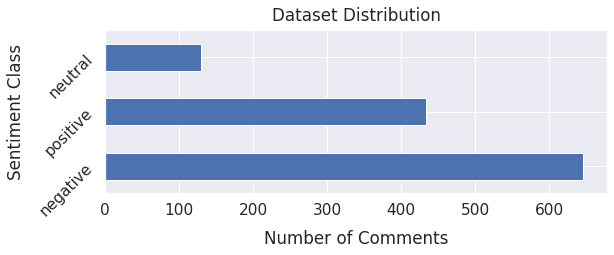

In [ ]:
sns.set(font_scale=1.4)
data['sentiment'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Sentiment Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

In [ ]:
data['sentiment'].value_counts()

negative    646
positive    434
neutral     130
Name: sentiment, dtype: int64

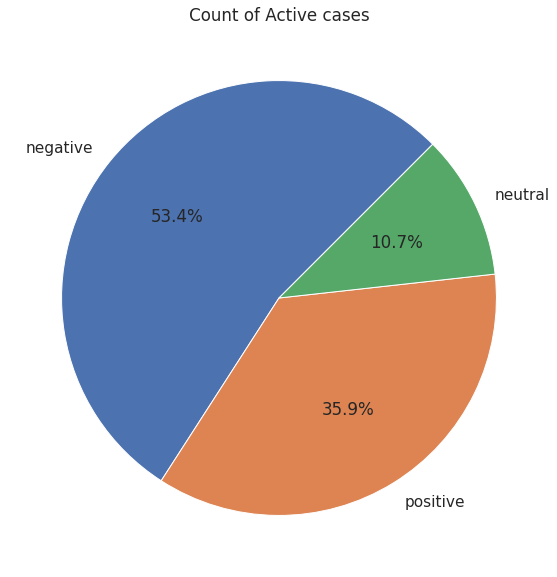

In [ ]:
data_pie= data['sentiment'].value_counts().rename_axis('sentiment').reset_index(name='Sentiments')

plt.figure(figsize=(10,10))

plt.pie(data_pie.Sentiments, labels=data_pie.sentiment, startangle=45,autopct='%1.1f%%')

plt.title('Count of Active cases')

plt.show()

Original:
 আমার পরিবারের সবাই নিবন্ধনের ২ মাসের মধ্যেই টিকা পেয়ে গিয়েছি। 
Cleaned:
 আমার পরিবারের সবাই নিবন্ধনের ২ মাসের মধ্যেই টিকা পেয়ে গিয়েছি  
 Sentiment:--  positive 

Original:
 কে বলছে টিকা নিলে করোনায় আক্রান্ত হবে না! 
Cleaned:
 কে বলছে টিকা নিলে করোনায় আক্রান্ত হবে না  
 Sentiment:--  negative 

Original:
 টিকার উপর কোনো ভরসা নেই 
Cleaned:
 টিকার উপর কোনো ভরসা নেই 
 Sentiment:--  negative 

After Cleaning: 
Removed 0 Small Reviews 
Total Reviews: 1210

Class Name :  negative
Number of Documents:646
Number of Words:6749
Number of Unique Words:1983
Most Frequent Words:

টিকা	572
না	179
করোনা	123
টিকার	79
নেওয়ার	76
পর	74
এই	64
আক্রান্ত	62
হবে	50
আমি	47

Class Name :  positive
Number of Documents:434
Number of Words:4906
Number of Unique Words:1617
Most Frequent Words:

টিকা	414
করোনা	78
হবে	68
না	58
টিকার	46
আমি	41
এই	37
কোন	33
ও	30
করা	30

Class Name :  neutral
Number of Documents:130
Number of Words:1593
Number of Unique Words:836
Most Frequent Words:

টিকা	115
না	36
করোনা	23
ক

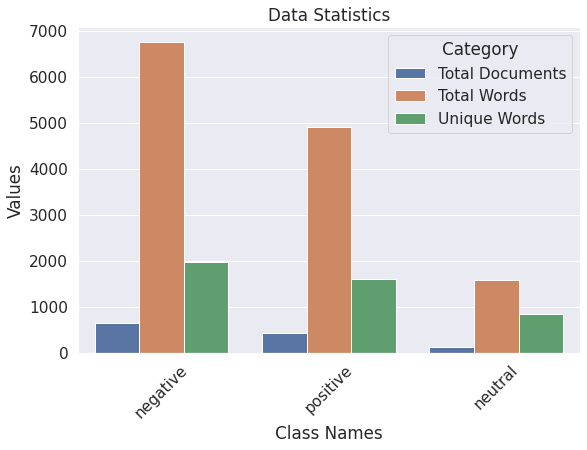

In [ ]:

# Data cleaning function
def process_comments(Comment): 
    Comment = re.sub('[^\u0980-\u09FF]',' ',str(Comment)) #removing unnecessary punctuation
    stopwords = ""
    return Comment

# Apply the function into the dataframe
data['cleaned'] = data['comments'].apply(process_comments)  

# print some cleaned reviews from the dataset
sample_data = [100,854,966]
for i in sample_data:
     print('Original:\n',data.comments[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Sentiment:-- ',data.sentiment[i],'\n')

# Length of each Reveiws
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))
# Remove the reviews with least words
dataset = data.loc[data.length>1]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Reviews".format(len(data)-len(dataset)),
      "\nTotal Reviews:",len(dataset))

def data_summary(dataset):
    
    """
    This function will print the summary of the reviews and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.sentiment.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.sentiment==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.sentiment==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.sentiment==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label




#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(9, 6))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

In [ ]:
# from sklearn.feature_extraction import text
# words = pd.read_fwf('/content/stop_words.txt')
# #removing stopwords
# data['cleaned'] = data['cleaned'].apply(lambda x: [i for i in x if i not in words])
# data['cleaned'] = data['cleaned'].apply(lambda x: ' '.join(x))

# #call the fucntion
# documents,words,u_words,class_names = data_summary(dataset)
# data_matrix = pd.DataFrame({'Total Documents':documents,
#                             'Total Words':words,
#                             'Unique Words':u_words,
#                             'Class Names':class_names})
# df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
# plt.figure(figsize=(9, 6))
# ax = plt.subplot()

# sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
# ax.set_xlabel('Class Names') 
# ax.set_title('Data Statistics')

# ax.xaxis.set_ticklabels(class_names, rotation=45);

In [ ]:
# print some unprocessed reviews
sample_data = [55,100,854,966]
for i in sample_data:
     print('Original:\n',data.comments[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Sentiment:-- ',data.sentiment[i],'\n')

Original:
 জন্মের পর থেকে এ পর্যন্ত কোন টিকা গ্রহণ করিনি, আর গ্রহণ করবোওনা ইনশাআল্লাহ 
Cleaned:
 জন্মের পর থেকে এ পর্যন্ত কোন টিকা গ্রহণ করিনি  আর গ্রহণ করবোওনা ইনশাআল্লাহ 
 Sentiment:--  negative 

Original:
 আমার পরিবারের সবাই নিবন্ধনের ২ মাসের মধ্যেই টিকা পেয়ে গিয়েছি। 
Cleaned:
 আমার পরিবারের সবাই নিবন্ধনের ২ মাসের মধ্যেই টিকা পেয়ে গিয়েছি  
 Sentiment:--  positive 

Original:
 কে বলছে টিকা নিলে করোনায় আক্রান্ত হবে না! 
Cleaned:
 কে বলছে টিকা নিলে করোনায় আক্রান্ত হবে না  
 Sentiment:--  negative 

Original:
 টিকার উপর কোনো ভরসা নেই 
Cleaned:
 টিকার উপর কোনো ভরসা নেই 
 Sentiment:--  negative 



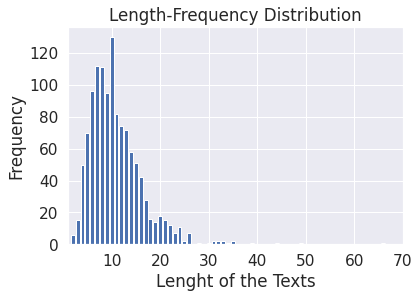

Maximum Length of a review: 85
Minimum Length of a review: 2
Average Length of a reviews: 11.0


In [ ]:
# Calculate the Review of each of the Review
dataset['ReviewLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 70)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a review: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a review: {min(dataset.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(dataset.ReviewLength),0)}")

<ipython-input-10-05e79c4ec2a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_data['ReviewLength'] = pos_data.cleaned.apply(lambda x:len(x.split()))


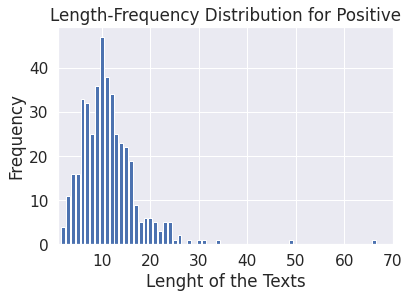

Maximum Length of a review: 66
Minimum Length of a review: 2
Average Length of a reviews: 11.0


In [ ]:
# Calculate the Review of each of the Review
pos_data = dataset.loc[dataset['sentiment'] == 'positive']
pos_data['ReviewLength'] = pos_data.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in pos_data.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 70)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution for Positive')
plt.show()  
print(f"Maximum Length of a review: {max(pos_data.ReviewLength)}")
print(f"Minimum Length of a review: {min(pos_data.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(pos_data.ReviewLength),0)}")

<ipython-input-11-7575636fe61e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_data['ReviewLength'] = neg_data.cleaned.apply(lambda x:len(x.split()))


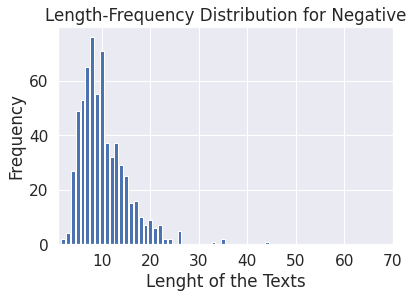

Maximum Length of a review: 85
Minimum Length of a review: 2
Average Length of a reviews: 10.0


In [ ]:
# Calculate the Review of each of the Review
neg_data = dataset.loc[dataset['sentiment'] == 'negative']
neg_data['ReviewLength'] = neg_data.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in neg_data.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 70)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution for Negative')
plt.show()  
print(f"Maximum Length of a review: {max(neg_data.ReviewLength)}")
print(f"Minimum Length of a review: {min(neg_data.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(neg_data.ReviewLength),0)}")

<ipython-input-12-7d8864f12990>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neu_data['ReviewLength'] = neu_data.cleaned.apply(lambda x:len(x.split()))


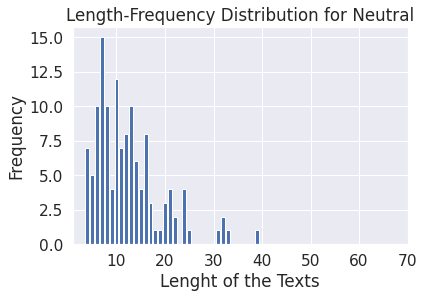

Maximum Length of a review: 39
Minimum Length of a review: 4
Average Length of a reviews: 12.0


In [ ]:
# Calculate the Review of each of the Review
neu_data = dataset.loc[dataset['sentiment'] == 'neutral']
neu_data['ReviewLength'] = neu_data.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in neu_data.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 70)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution for Neutral')
plt.show()  
print(f"Maximum Length of a review: {max(neu_data.ReviewLength)}")
print(f"Minimum Length of a review: {min(neu_data.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(neu_data.ReviewLength),0)}")

In [ ]:
from wordcloud import WordCloud
# https://github.com/amueller/word_cloud/issues/367
# https://stackoverflow.com/questions/54063438/create-wordcloud-in-python-for-foreign-language-hebrew
# https://www.omicronlab.com/bangla-fonts.html
rgx = r"[\u0980-\u09FF]+"
wordcloud = WordCloud(font_path='/content/SolaimanLipi_20-04-07.ttf', 
regexp=rgx).generate(' '.join(pos_data['cleaned'].tolist()))

#wordcloud = WordCloud(font_path='/content/FreeSansBold.ttf').generate(bidi_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Positive Review word')
plt.figure(figsize=(9, 6))
plt.show()

OSError: ignored

In [ ]:
from wordcloud import WordCloud
# https://github.com/amueller/word_cloud/issues/367
# https://stackoverflow.com/questions/54063438/create-wordcloud-in-python-for-foreign-language-hebrew
# https://www.omicronlab.com/bangla-fonts.html
rgx = r"[\u0980-\u09FF]+"
wordcloud = WordCloud(font_path='/content/SolaimanLipi_20-04-07.ttf', 
regexp=rgx).generate(' '.join(neg_data['cleaned'].tolist()))

#wordcloud = WordCloud(font_path='/content/FreeSansBold.ttf').generate(bidi_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Negative word')
plt.figure(figsize=(9, 6))
plt.show()

In [ ]:
from wordcloud import WordCloud
# https://github.com/amueller/word_cloud/issues/367
# https://stackoverflow.com/questions/54063438/create-wordcloud-in-python-for-foreign-language-hebrew
# https://www.omicronlab.com/bangla-fonts.html
rgx = r"[\u0980-\u09FF]+"
wordcloud = WordCloud(font_path='/content/SolaimanLipi_20-04-07.ttf', 
regexp=rgx).generate(' '.join(neu_data['cleaned'].tolist()))

#wordcloud = WordCloud(font_path='/content/FreeSansBold.ttf').generate(bidi_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Neutral word')
plt.figure(figsize=(9, 6))
plt.show()